In [44]:
%matplotlib widget
from atcf import get_ax, cross_track, fill_speed_heading, new_besttrack_times, plot_track, veer_track
import logging
from metpy.units import units
import numpy as np
from stormevents.nhc import VortexTrack

In [45]:
track = VortexTrack.from_storm_name('ian',2022)


/Users/ahijevyc/miniconda3/envs/new/lib/python3.10/site-packages/stormevents/nhc/atcf.py:379: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data.loc[best_track_records, 'YYYYMMDDHH'] += data.loc[best_track_records, 'TECHNUM/MIN']
/Users/ahijevyc/miniconda3/envs/new/lib/python3.10/site-packages/stormevents/nhc/atcf.py:380: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data.loc[~best_track_records, 'YYYYMMDDHH'] += '00'
/Users/ahijevyc/miniconda3/envs/new/lib/python3.10/site-packages/stormevents/nhc/atcf.py:383: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data.loc[data['LatN/S'].str.endswith('N'), 'LatN/S'] = data['LatN/S'].str.strip('N')
/Users/ahijevyc/miniconda3/envs/new

In [46]:
track.data

,basin,storm_number,datetime,record_type_number,record_type,forecast_hours,latitude,longitude,max_sustained_wind_speed,central_pressure,...,name,depth_code,isowave,isowave_quadrant_code,isowave_radius_for_NEQ,isowave_radius_for_SEQ,isowave_radius_for_NWQ,isowave_radius_for_SWQ,extra_values,geometry
0,AL,09,2022-09-19 12:00:00,,BEST,0,9.9,-46.6,20.0,1012.0,...,GENESIS028,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-46.60000 9.90000)
1,AL,09,2022-09-19 18:00:00,,BEST,0,10.1,-48.2,15.0,1012.0,...,GENESIS028,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-48.20000 10.10000)
2,AL,09,2022-09-20 00:00:00,,BEST,0,10.0,-49.8,20.0,1012.0,...,GENESIS028,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-49.80000 10.00000)
3,AL,09,2022-09-20 06:00:00,,BEST,0,10.2,-51.9,25.0,1012.0,...,GENESIS028,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-51.90000 10.20000)
4,AL,09,2022-09-20 12:00:00,,BEST,0,10.0,-55.0,30.0,1010.0,...,INVEST,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-55.00000 10.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,AL,09,2022-10-01 00:00:00,,BEST,0,34.4,-79.3,50.0,990.0,...,IAN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-79.30000 34.40000)
88,AL,09,2022-10-01 06:00:00,,BEST,0,35.3,-79.7,15.0,1005.0,...,IAN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-79.70000 35.30000)
89,AL,09,2022-10-01 12:00:00,,BEST,0,35.8,-79.9,20.0,1005.0,...,IAN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-79.90000 35.80000)
90,AL,09,2022-10-01 18:00:00,,BEST,0,36.7,-79.2,20.0,1008.0,...,IAN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-79.20000 36.70000)


In [47]:
columns = {"datetime":"valid_time", "max_sustained_wind_speed":"vmax", "longitude":"lon","latitude":"lat",
          "storm_number":"cy", "record_type":"model"}

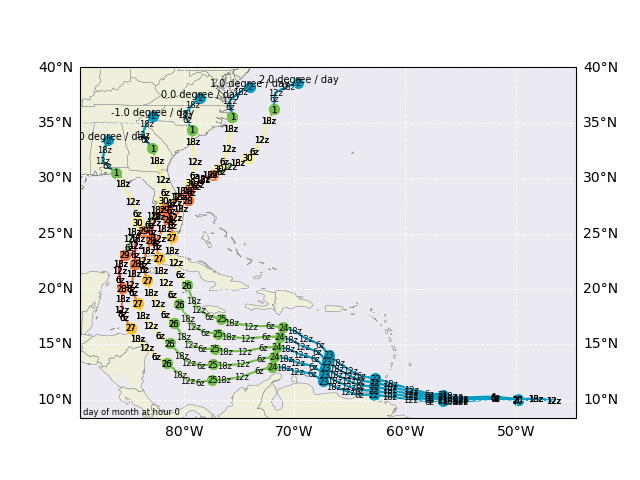

In [48]:
ax = get_ax()
for veer in np.arange(-2,3,1)*units.parse_expression("degree/day"):
    logging.warning(veer)
    vtrack = veer_track(track.data.rename(columns=columns), veer)
    plot_track(ax, '', vtrack, veer)

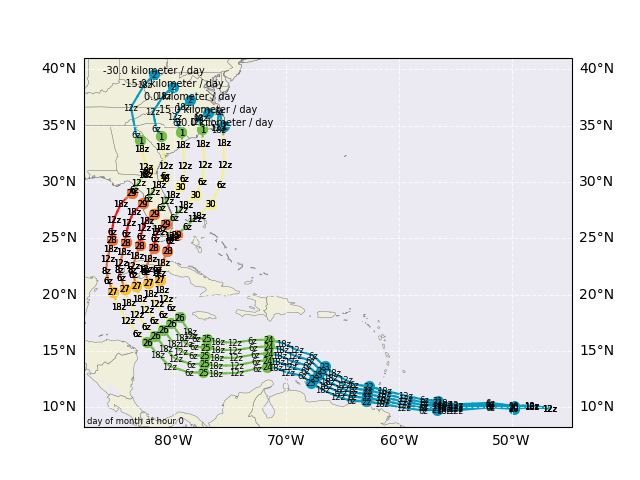

In [49]:
ax = get_ax()
for cross in np.arange(-30,45,15)*units.parse_expression("km/day"):
    logging.warning(cross)
    vtrack = new_besttrack_times(track.data.rename(columns=columns))
    vtrack = cross_track(fill_speed_heading(vtrack), cross)
    plot_track(ax, '', vtrack, cross)

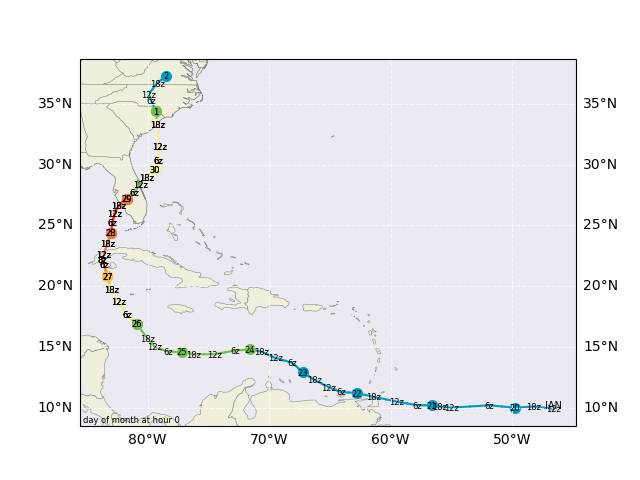

In [51]:
ax = get_ax()
plot_track(ax,track.name, track.data.rename(columns=columns), '') 